<a href="https://colab.research.google.com/github/WTanumihardja/Time-Series-Playground/blob/main/GDSC_ITB_2022_220010003_Daily_Min_Temperature_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GDSC ITB 2022/2023 - Last Project Submission**
---
**Author's Details**
*   Name : Wilbert Josef Tanumihardja
*   Member ID : 220010003
*   Path : Machine Learning/Data Science


## **Acknowledgement**

*I would like to express my deepest gratitude to GDSC ITB Lead 2022/2023 for giving me a precious opportunity to learn, grow, and connect within this great community. Also, I would like to express a lot of thanks to Core Team Members which have been worked hard to giving their best for the success of GDSC ITB.*

## **Project Details**
In this project, I gonna build a deep learning model for predicting univariate time-series data which in this project I'm using [Daily Min Temperature Dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv) from [jbrownlee's GitHub Repository](https://github.com/jbrownlee/Datasets). The dataset contains two columns. Those are Date (which spans from 1 January 1981 to 31 December 1990) and Temperature on that date.

With limited dataset, I'm using windowing techinque in this project to generate more data. I also splitting data for training and validation using 2500 as split point so the training data will have exactly 2500 records and the validation data will have 1500 records.

For the neural network itself, I'm combining 1-D Convolutional, LSTM, and also fully connected layer. With this architecture, the training process can be much faster and can give quite good accuracy. The metric I use in this project is Mean Absolute Error (MAE) because it is straightforward and much more resilient to outliers.

I compiled this model with Adam as optimizer, which can converge faster and Huber loss function as loss function, which less sensitive to outliers.

Finally, I train this model with 20 epochs which resulted accuracy around 80% with loss less than 0.6%.

### **Import Libraries**

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv
import urllib

### **Define Windowing Function**

In [2]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

### **Download Dataset**

In [3]:
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
urllib.request.urlretrieve(data_url, 'daily-min-temperatures.csv')

time_step = []
temps = []

with open('daily-min-temperatures.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    step = 0
    for row in reader:
        temps.append(float(row[1]))
        time_step.append(step)
        step=step + 1

series= np.array(temps)

### **Normalize Data**

In [4]:
min=np.min(series)
max=np.max(series)
series -= min
series /= max
time=np.array(time_step)

In [21]:
print(time)

[   0    1    2 ... 3647 3648 3649]


### **Split Data**

In [5]:
split_time=2500

time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [23]:
print(len(time_train), len(time_valid))

2500 1150


In [6]:
window_size=64
batch_size=256
shuffle_buffer_size=1000

train_set=windowed_dataset(
    x_train, window_size, batch_size, shuffle_buffer_size)

valid_set=windowed_dataset(
    x_valid, window_size, batch_size, shuffle_buffer_size
)

In [7]:
print(train_set)
print(x_train.shape)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(2500,)


### **Build Model**

In [8]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(
          filters=64,
          kernel_size=3,
          strides=1,
          padding='causal',
          activation='relu',
          input_shape=[None, 1]
      ),
      tf.keras.layers.LSTM(64, return_sequences=True),
      tf.keras.layers.LSTM(64),
      tf.keras.layers.Dense(30, activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(1),
  ])

### **Compiling Model**

In [9]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(),
      loss=tf.keras.losses.Huber(),
      metrics=['mae']
  )

### **Train Model**

In [13]:
history = model.fit(
      train_set,
      epochs=20,
      verbose=2,
      validation_data=valid_set
  )

Epoch 1/20
10/10 - 11s - loss: 0.0059 - mae: 0.0855 - val_loss: 0.0052 - val_mae: 0.0800 - 11s/epoch - 1s/step
Epoch 2/20
10/10 - 5s - loss: 0.0059 - mae: 0.0856 - val_loss: 0.0052 - val_mae: 0.0801 - 5s/epoch - 471ms/step
Epoch 3/20
10/10 - 6s - loss: 0.0059 - mae: 0.0856 - val_loss: 0.0052 - val_mae: 0.0801 - 6s/epoch - 599ms/step
Epoch 4/20
10/10 - 5s - loss: 0.0059 - mae: 0.0855 - val_loss: 0.0052 - val_mae: 0.0799 - 5s/epoch - 504ms/step
Epoch 5/20
10/10 - 5s - loss: 0.0059 - mae: 0.0855 - val_loss: 0.0052 - val_mae: 0.0799 - 5s/epoch - 502ms/step
Epoch 6/20
10/10 - 5s - loss: 0.0059 - mae: 0.0855 - val_loss: 0.0052 - val_mae: 0.0800 - 5s/epoch - 463ms/step
Epoch 7/20
10/10 - 6s - loss: 0.0059 - mae: 0.0855 - val_loss: 0.0052 - val_mae: 0.0799 - 6s/epoch - 594ms/step
Epoch 8/20
10/10 - 5s - loss: 0.0059 - mae: 0.0855 - val_loss: 0.0052 - val_mae: 0.0800 - 5s/epoch - 464ms/step
Epoch 9/20
10/10 - 5s - loss: 0.0059 - mae: 0.0855 - val_loss: 0.0052 - val_mae: 0.0801 - 5s/epoch - 529m

### **Plot Model's Performance**

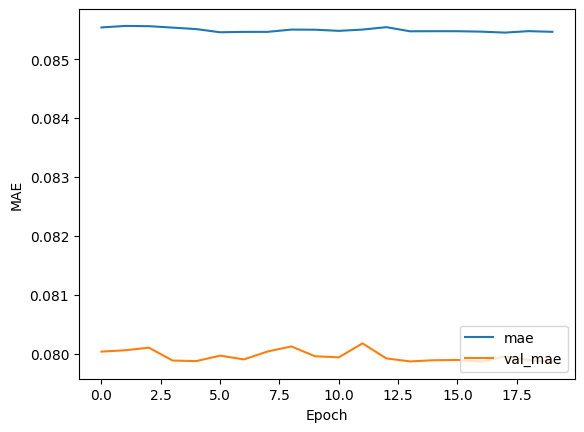

In [20]:
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='lower right')

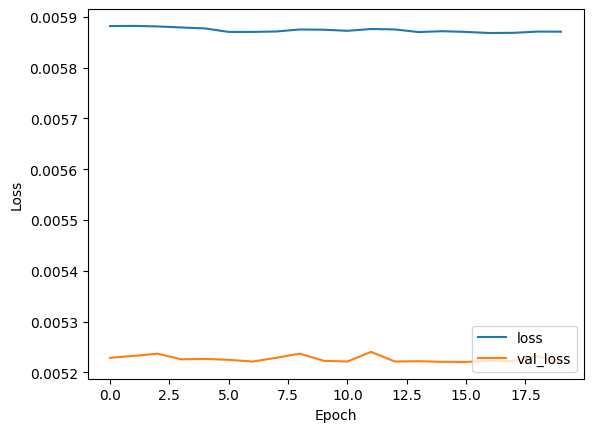

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')